In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [47]:
# Lista de tonos de verde
tonos_verdes = [
    "#C8FFB4",  # Verde claro
    "#A3FF91",  # Verde claro-medio
    "#7FFF6E",  # Verde medio
    "#5BCF4F",  # Verde medio-intenso
    "#3FA33F",  # Verde intenso
    "#2E8330",  # Verde oscuro-intenso
    "#1F6420",  # Verde oscuro
    "#0F4710",  # Verde oscuro-medio
    "#002500"   # Verde muy oscuro
]

In [102]:

def visualitzar(bosc, humitat, estats):
    
    n = len(bosc)
    m = len(bosc[0])
    # Crear la visualización de la matriz
    plt.figure(figsize=(8, 8))

    # Mapeo de colores personalizado utilizando la lista de tonos de verde
    cmap_custom = ListedColormap(tonos_verdes)

    # Establecer el color para valores por debajo del mínimo
    cmap_custom.set_under('#8B4513')

    # Crear una copia de la matriz para colorear las casillas con valor 0 en marrón
    bosc_colors = np.where(bosc == 0, 0.1, bosc)

    # Excluir el valor 1 y asegurarse de que el color marrón se muestre correctamente
    plt.imshow(bosc_colors, cmap=cmap_custom, vmin=0.5, vmax=10)

    # Eliminar la barra de colores
    plt.colorbar().remove()

    # Eliminar los índices de los valores
    plt.xticks([])
    plt.yticks([])
    # Resaltar las celdas con un borde si su valor es mayor que cierto umbral

    for i in range(n):
        for j in range(m):
            if estats[i][j] == 1:
                # Dibujar un borde rojo alrededor de la celda
                plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.52), 1, 1, fill=True, color='#FF4500'))
            elif estats[i][j] == 2:
                plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.52), 1, 1, fill=True, color='#333333'))
                

    plt.title('Incendi Forestal')
    plt.xlabel('Coordenadas X')
    plt.ylabel('Coordenadas Y')
    plt.show()


In [100]:
def actualitzar_bosc(bosc, humitat, estats):
    filas = len(bosc)
    columnas = len(bosc[0])

    for i in range(filas):
        for j in range(columnas):
            if estats[i][j] == 1:  # Si la celda tiene fuego
                # Verificar si alguna celda vecina tiene humedad
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < filas and 0 <= nj < columnas:
                            if humitat[ni][nj] > 0:
                                humitat[ni][nj] -= 1
                                if humitat[ni][nj] == 0:
                                    estats[ni][nj] = 1  # La celda se quema
                            elif bosc[ni][nj] > 0:
                                bosc[ni][nj] -= 1
                                if bosc[ni][nj] == 0:
                                    estats[ni][nj] = 2  # La celda se quema completamente
    
    return bosc, humitat, estats

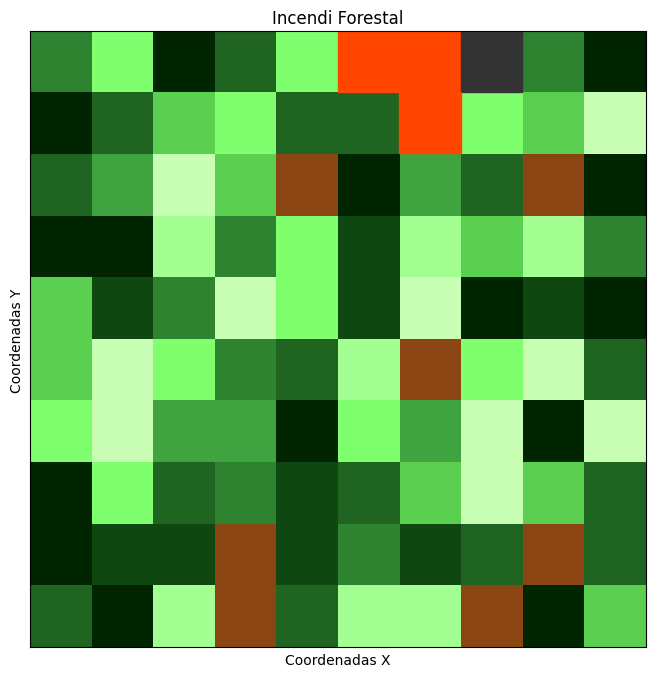

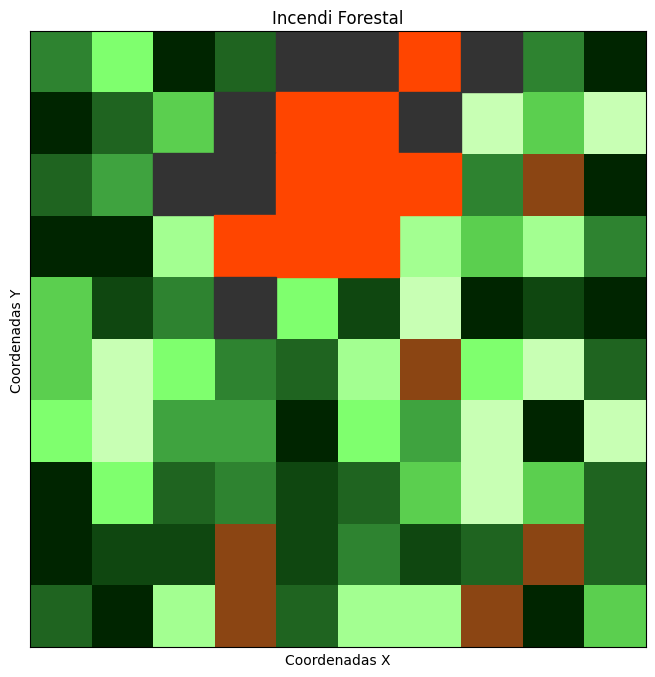

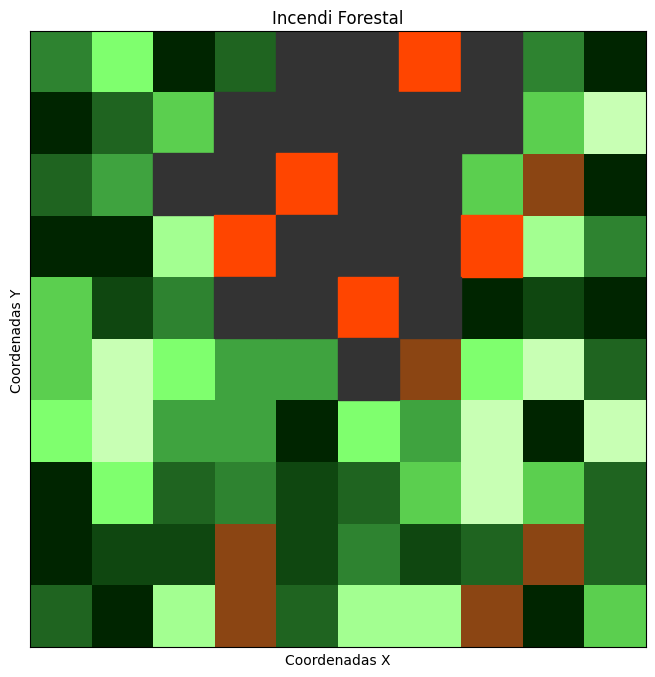

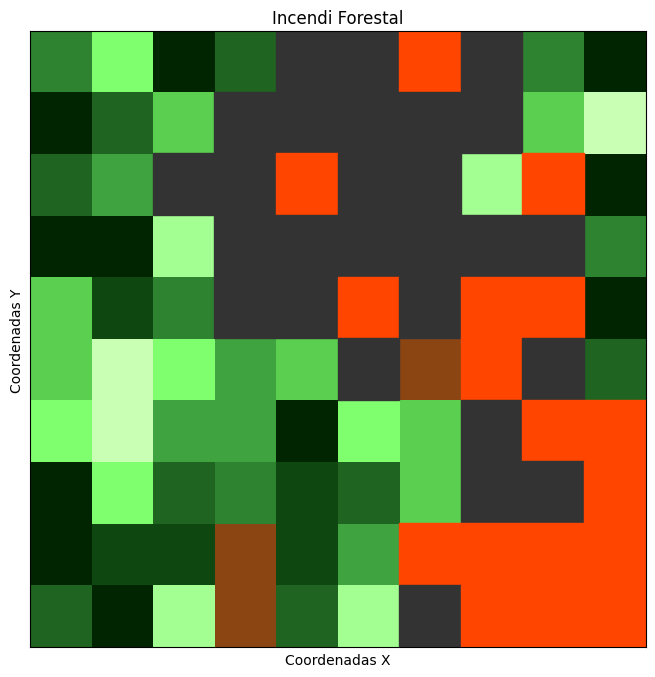

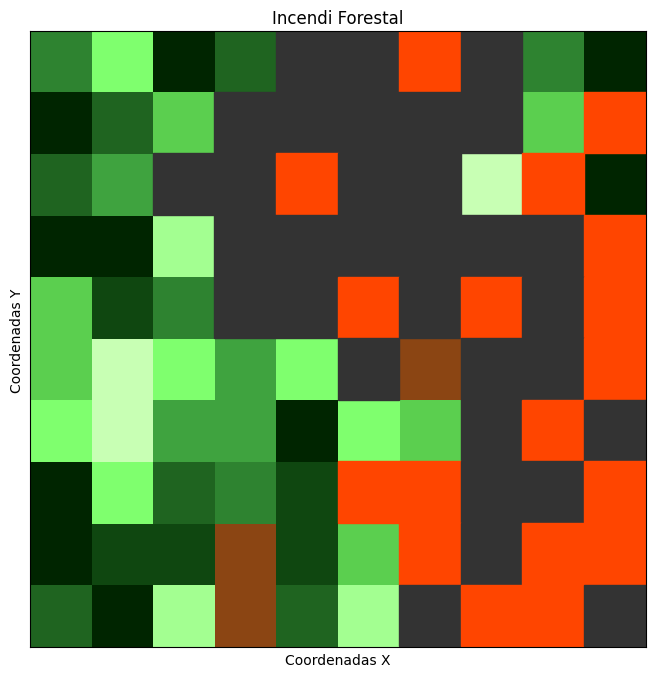

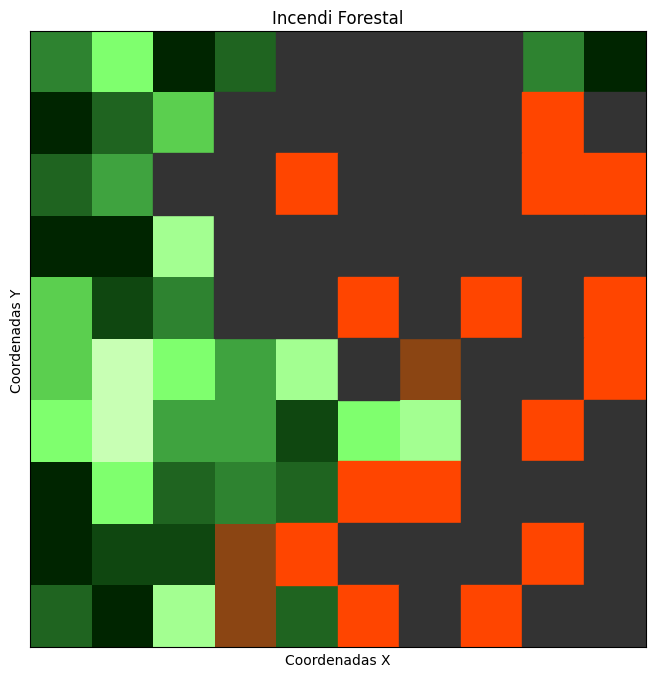

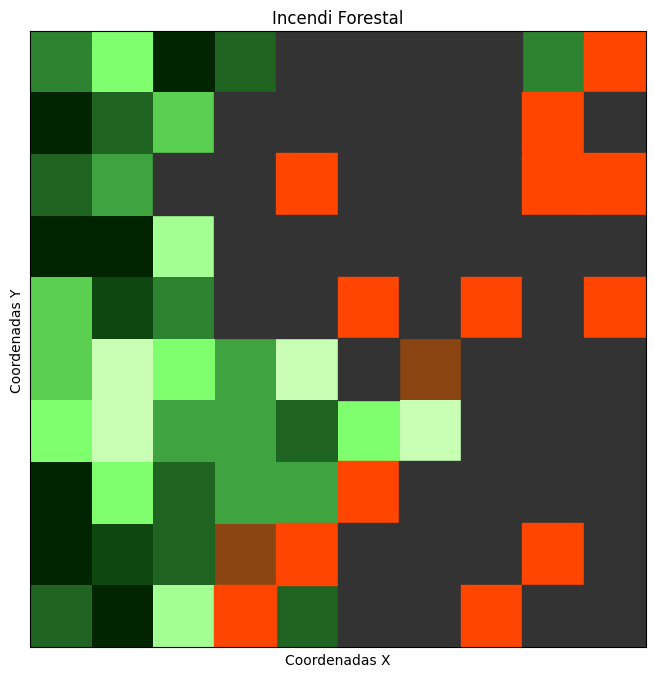

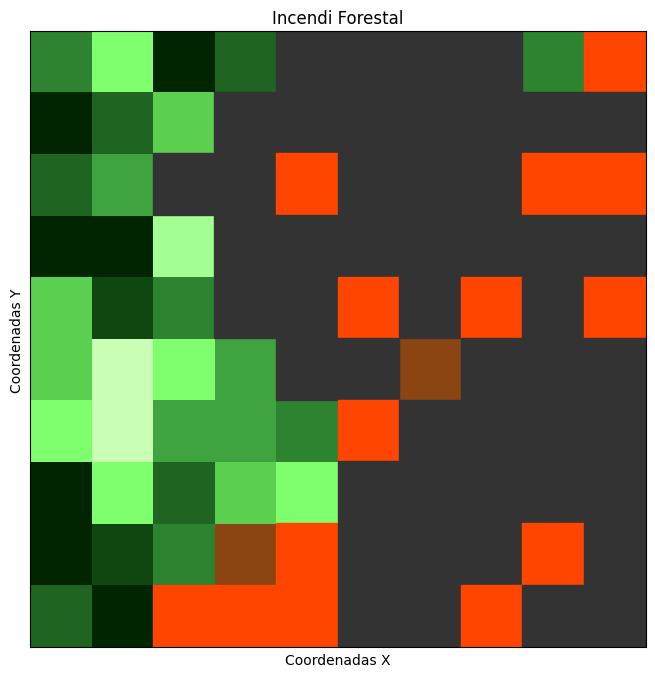

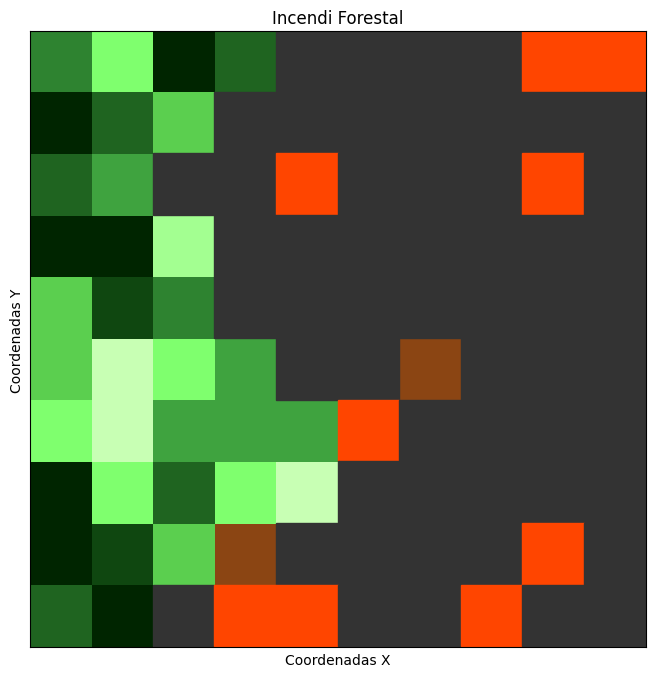

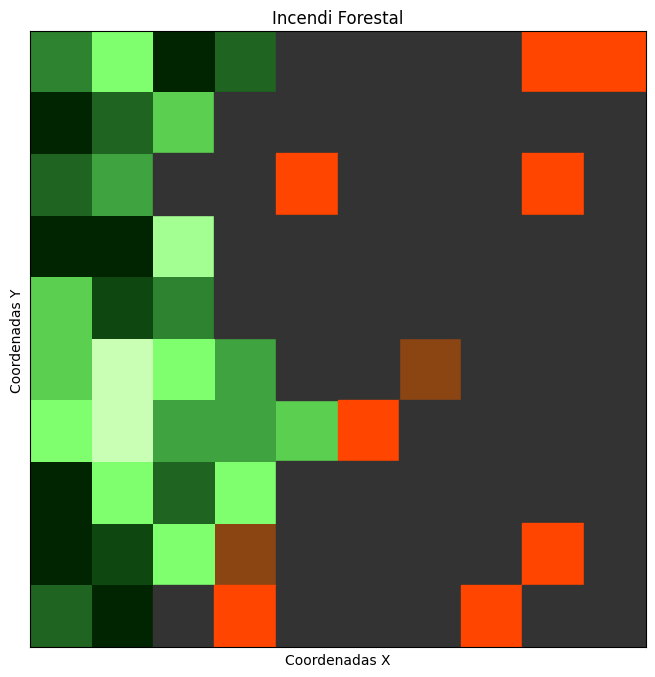

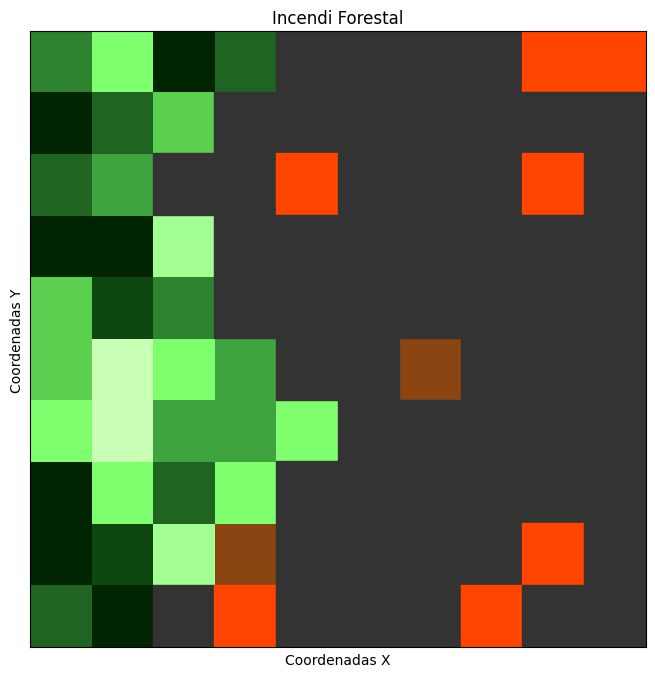

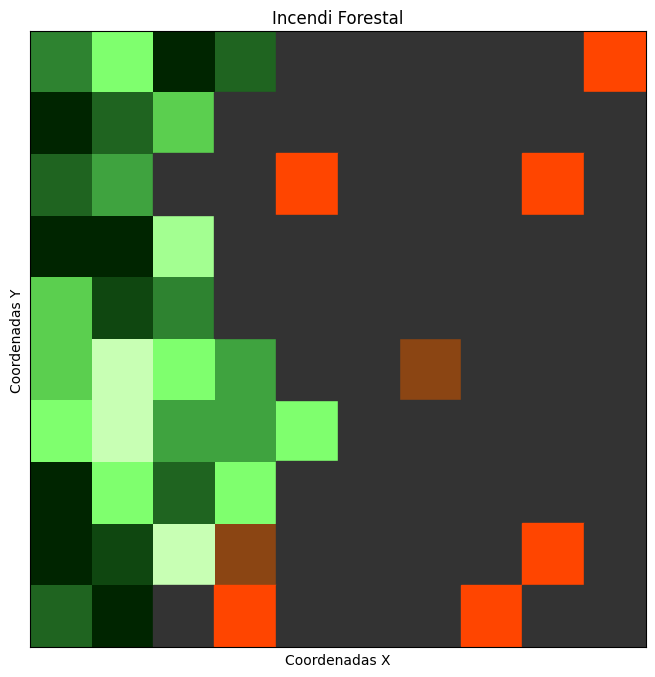

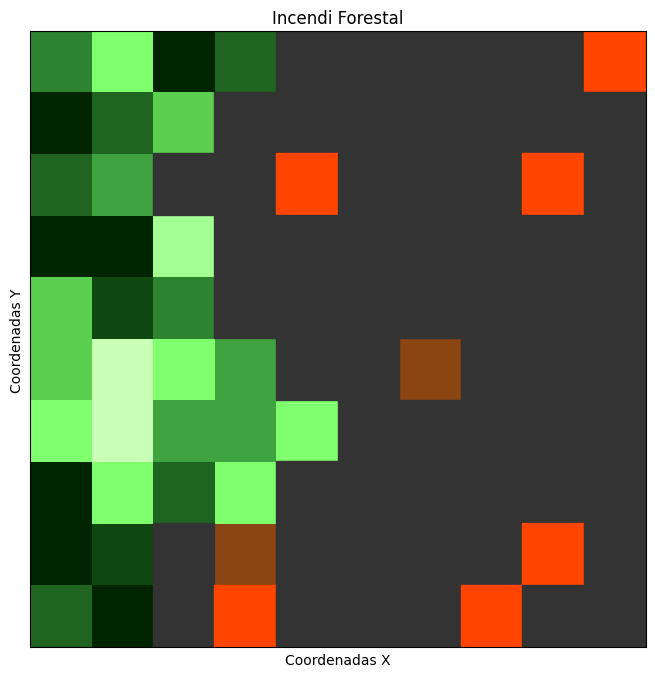

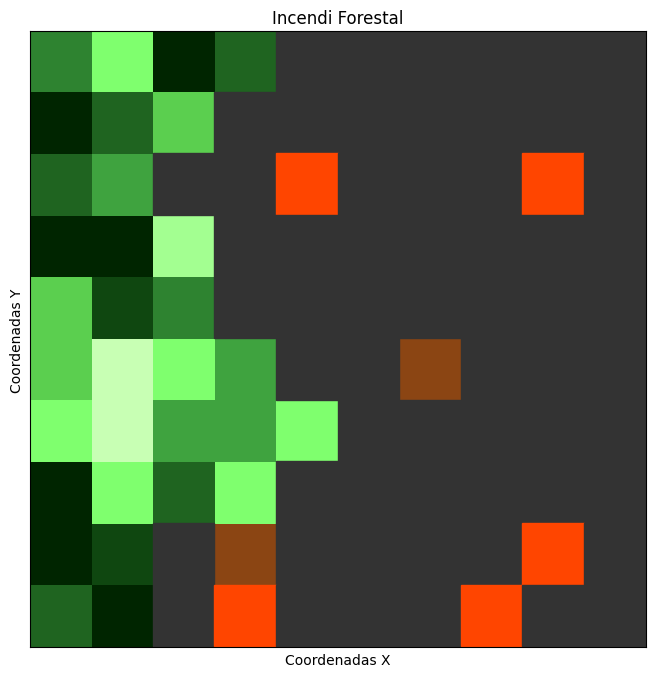

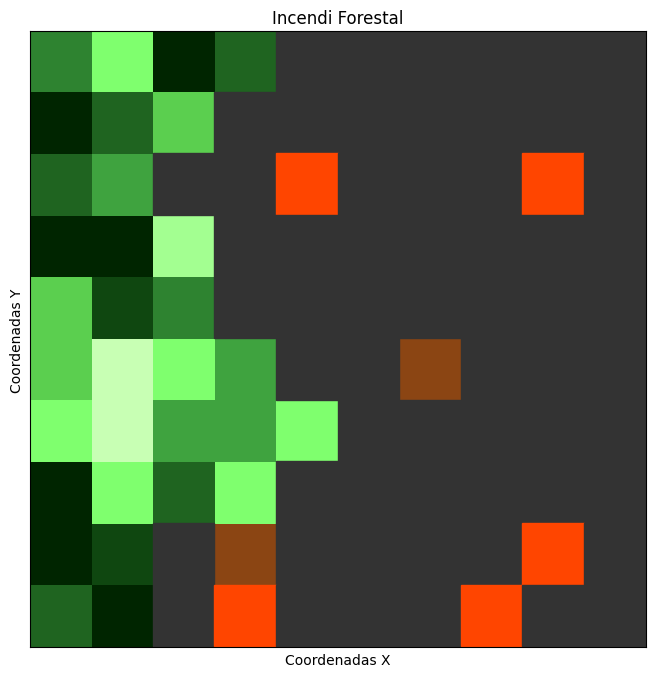

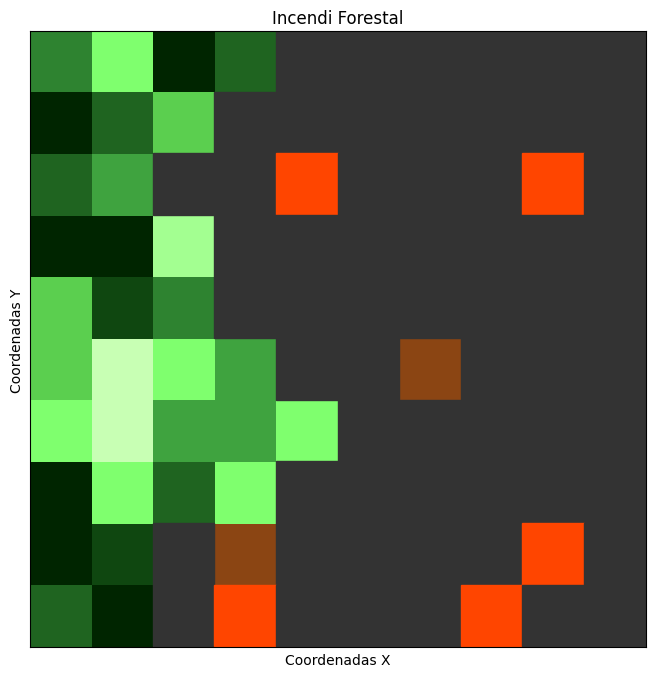

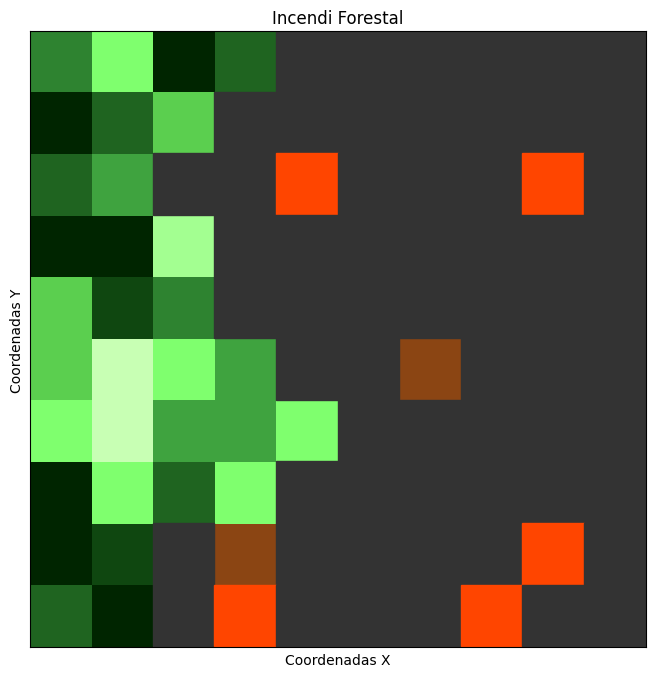

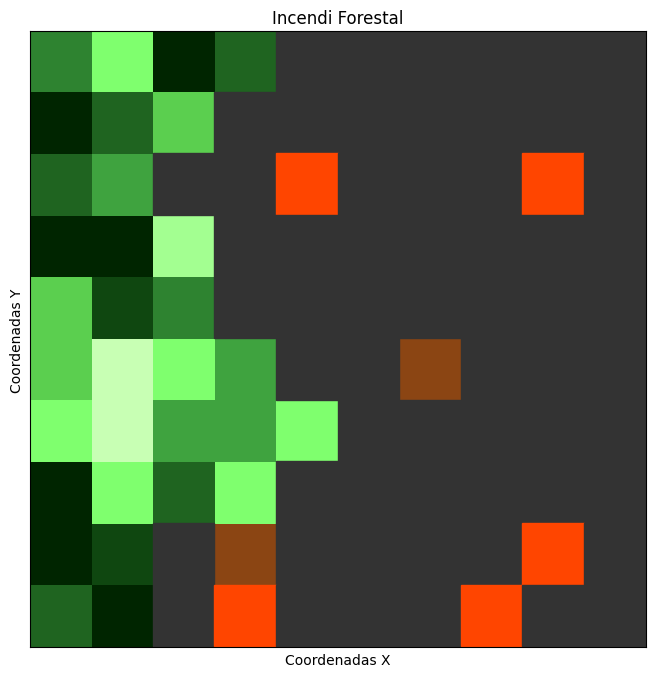

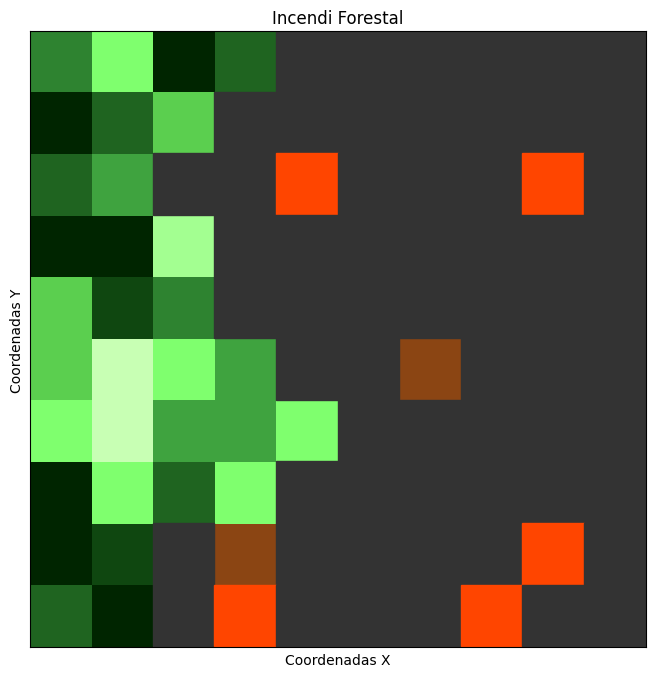

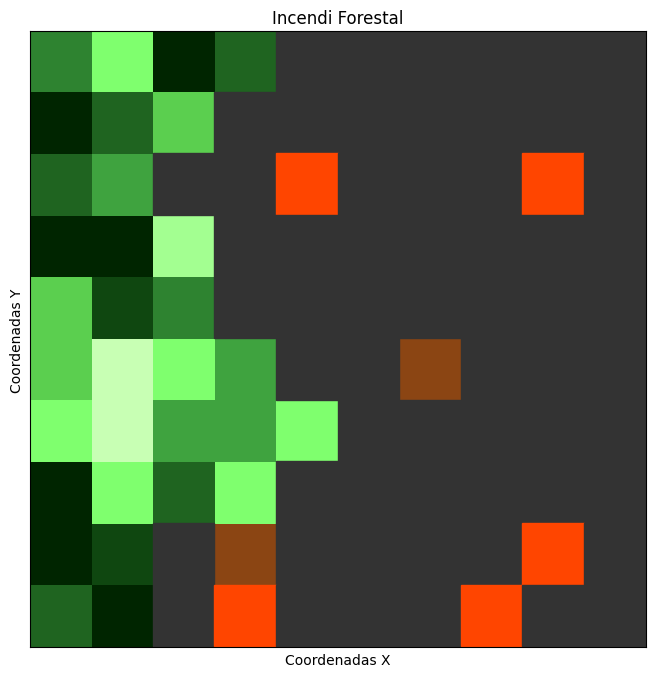

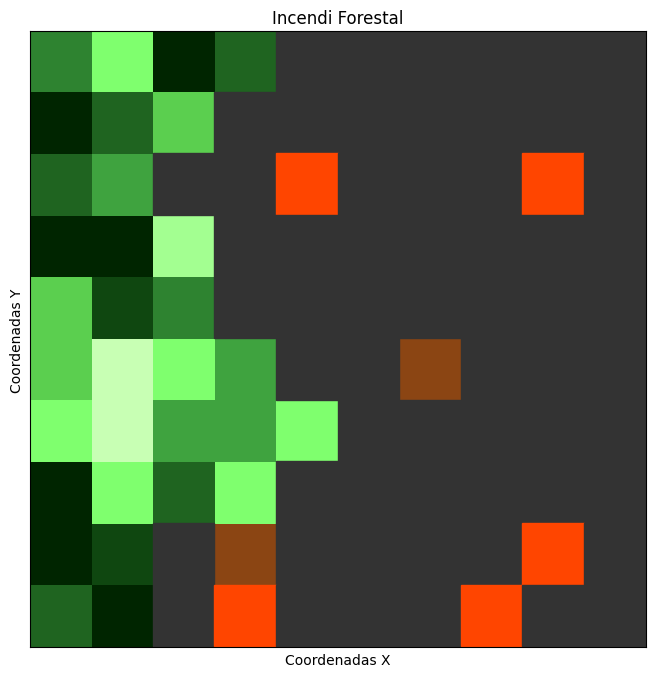

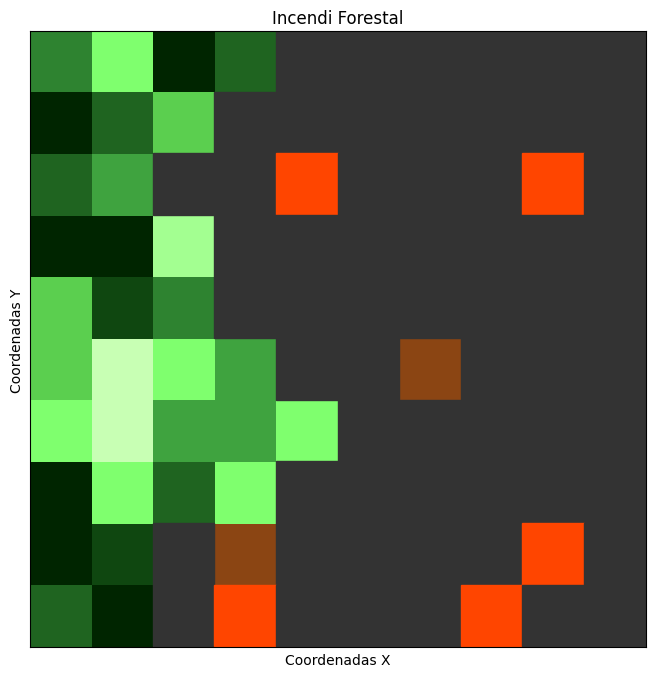

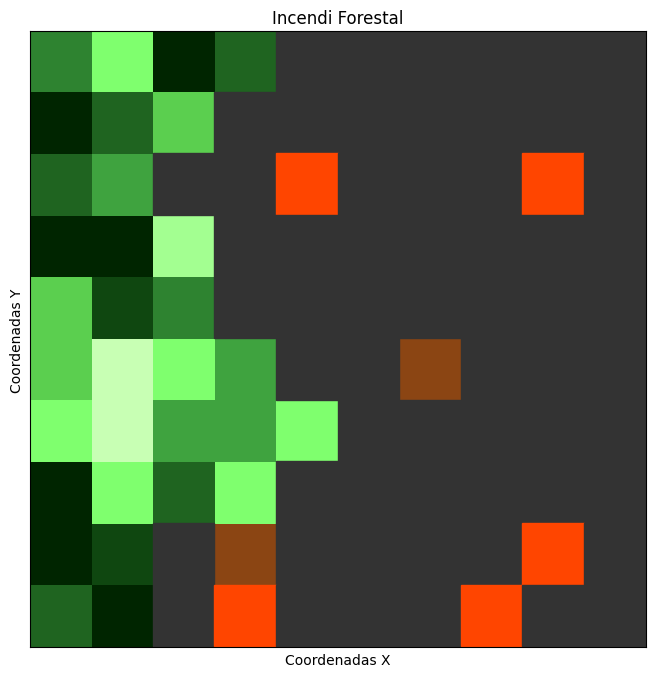

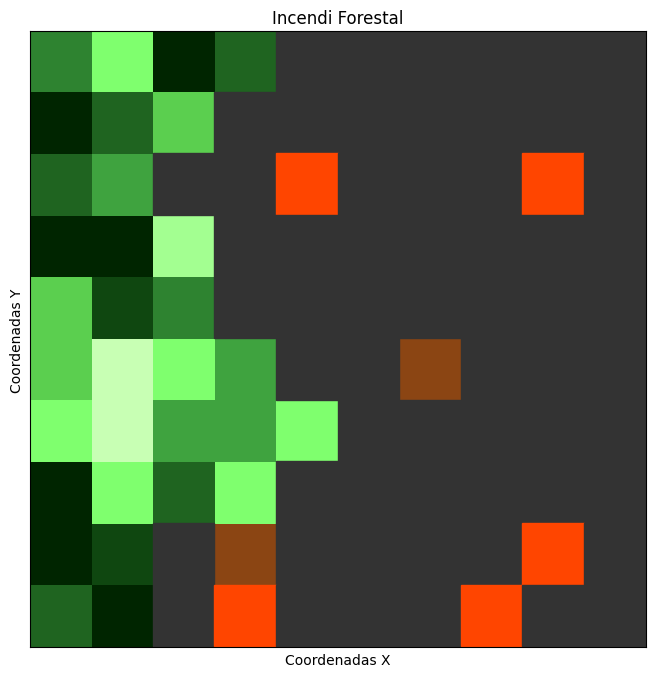

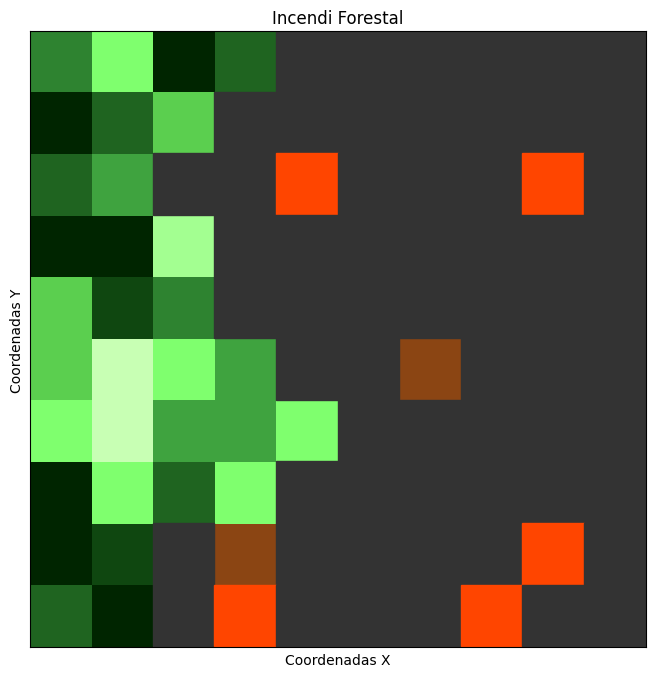

In [104]:
np.random.seed(42)
# Definir las dimensiones de la matriz
n = 10  # Número de filas
m = 10  # Número de columnas

# Crear la matriz con valores aleatorios entre 0 y 10
bosc = np.random.randint(0, 11, size=(n, m))

humitat = np.random.randint(0, 5, size=(n, m))

estats = np.zeros((n, m), dtype=int)

x_fire, y_fire = np.random.randint(0, n), np.random.randint(0, m)

humitat[x_fire][y_fire] = 0
estats[x_fire][y_fire] = 1

for i in range(25):
    
    bosc, humitat, estats = actualitzar_bosc(bosc, humitat, estats)
    
    visualitzar(bosc, humitat, estats)